<a href="https://colab.research.google.com/github/oonhy/Data/blob/main/SNU/practice_week_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

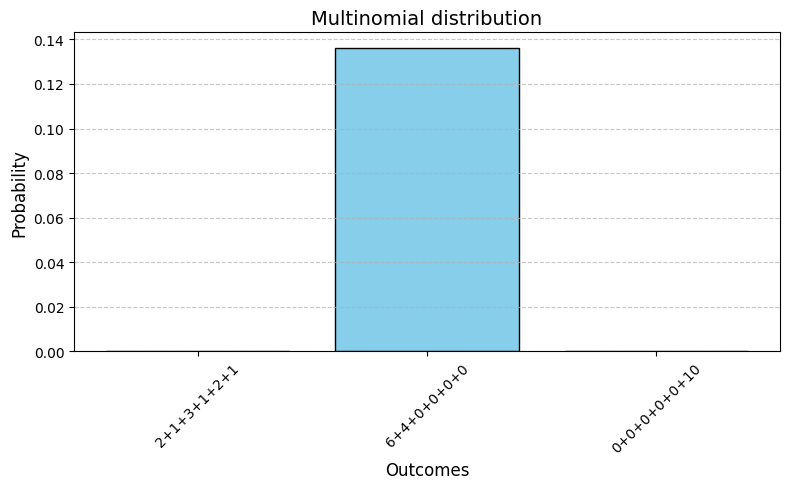

Probabilities for each outcome
	Outcome 2+1+3+1+2+1: 0.000000
	Outcome 6+4+0+0+0+0: 0.136343
	Outcome 0+0+0+0+0+10: 0.000000


In [2]:
from scipy.stats import multinomial
import matplotlib.pyplot as plt

n = 10
# before
# probabilities = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

# after
probabilities = [48/100, 48/100, 1/100, 1/100, 1/100, 1/100]

outcomes = [
    [2, 1, 3, 1, 2, 1],
    [6, 4, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 10]
]

probabilities_outcomes = []
for outcome in outcomes:
    prob = multinomial.pmf(outcome, n=n, p=probabilities)
    probabilities_outcomes.append(prob)
outcome_labels = ['+'.join(map(str, outcome)) for outcome in outcomes]

plt.figure(figsize=(8, 5))
plt.bar(outcome_labels, probabilities_outcomes, color='skyblue', edgecolor='black')
plt.title('Multinomial distribution', fontsize=14)
plt.xlabel('Outcomes', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print('Probabilities for each outcome')
for label, prob in zip(outcome_labels, probabilities_outcomes):
    print(f'\tOutcome {label}: {prob:.6f}')

∙ probability of k=0: 0.006737946999085467
∙ probability of k=1: 0.03368973499542734
∙ probability of k=2: 0.08422433748856832
∙ probability of k=3: 0.1403738958142805
∙ probability of k=4: 0.17546736976785063
∙ probability of k=5: 0.17546736976785068
∙ probability of k=6: 0.1462228081398754
∙ probability of k=7: 0.10444486295705395
∙ probability of k=8: 0.06527803934815865
∙ probability of k=9: 0.036265577415643714
∙ probability of k=10: 0.018132788707821854
∙ probability of k=11: 0.008242176685373562
∙ probability of k=12: 0.0034342402855723226
∙ probability of k=13: 0.0013208616482970467
∙ probability of k=14: 0.0004717363029632305



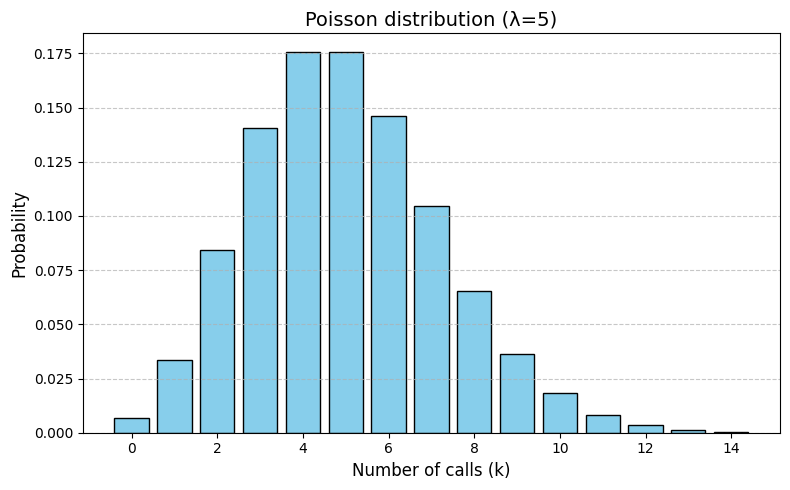

In [3]:
import numpy as np
from scipy.stats import poisson

lambda_value = 5
num_of_calls = np.arange(0, 15)

pmf_values = poisson.pmf(num_of_calls, mu=lambda_value)
for i, value in enumerate(pmf_values):
  print(f'∙ probability of k={i}: {value}')
print('')

plt.figure(figsize=(8, 5))
plt.bar(num_of_calls, pmf_values, color='skyblue', edgecolor='black')
plt.title(f'Poisson distribution (λ={lambda_value})', fontsize=14)
plt.xlabel('Number of calls (k)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

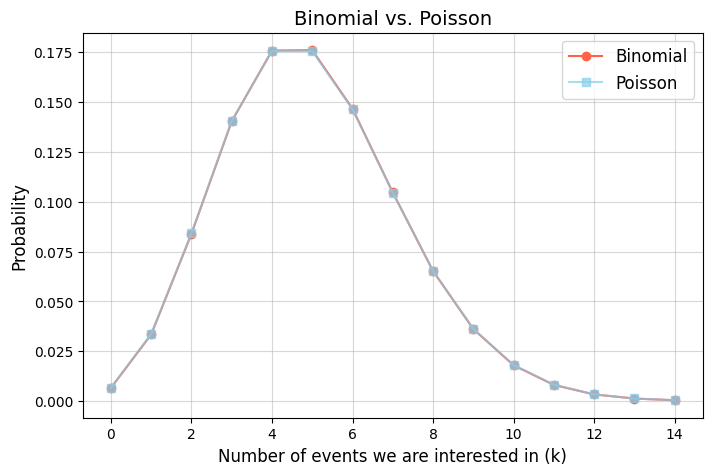

In [4]:
from scipy.stats import binom

# before
# n = 10

# after
n = 1000

lambda_value = 5
p = lambda_value / n
k_values = np.arange(0, 15)

binomial_pmf = binom.pmf(k_values, n, p)
poisson_pmf = poisson.pmf(k_values, mu=lambda_value)

plt.figure(figsize=(8, 5))
plt.plot(k_values, binomial_pmf, 'o-', label=f'Binomial', color='tomato')
plt.plot(k_values, poisson_pmf, 's-', label=f'Poisson', alpha=0.7, color='skyblue')
plt.title('Binomial vs. Poisson', fontsize=14)
plt.xlabel('Number of events we are interested in (k)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

In [5]:
lambda_value = 0.5
k = 4

pmf_values = poisson.pmf([k], mu=lambda_value)
print(f'∙ probability: {pmf_values[0]}')

∙ probability: 0.0015795069263349827


In [6]:
p = 0.15
k = 10

pmf_value = (1 - p)**(10 - 1) * p
print(f'∙ probability: {pmf_value}')

∙ probability: 0.03474254194248046


In [7]:
n = 200
p = 0.2
k = 50

pmf_values = binom.pmf([k], n, p)
print(f'∙ probability: {pmf_values[0]}')

∙ probability: 0.014856557516089386


∙ accumulated probability: 0.04935333238181808



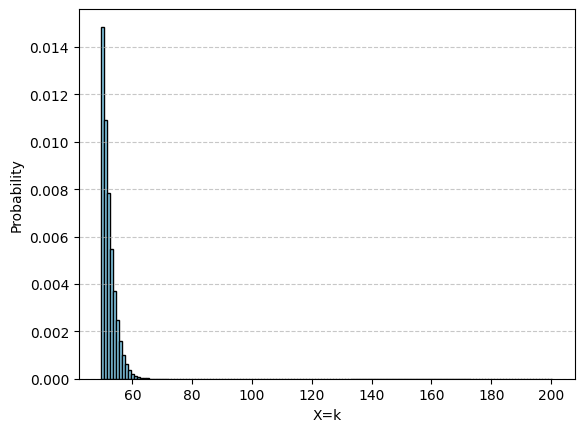

In [8]:
n = 200
p = 0.2
k = 50
k_values = np.arange(k, n+1)

#합 코드

accumulated_prob = 0
pmf_values = binom.pmf(k_values, n, p)
for value in pmf_values:
    accumulated_prob = accumulated_prob + value
print(f'∙ accumulated probability: {accumulated_prob}\n')

plt.bar(k_values, pmf_values, color='skyblue', edgecolor='black')
plt.xlabel('X=k')
plt.ylabel('Probability')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [27]:
p = 0.2
k = 50
n = 200

accumulated_prob = 0
target_prob = 0.9

# Do something
...

print(f'∙ Minimum n where accumulated probability ≥ {target_prob}: {n}')
print(f'∙ Accumulated probability at n = {n}: {accumulated_prob}')

#교수님 풀이 -> while문 + if문
while accumulated_prob < target_prob:
  k_values = np.arange(k, n+1)
  pmf_values = binom.pmf(k_values, n, p)
  accumulated_prob = np.sum(pmf_values)

  if accumulated_prob >= target_prob:
    break
  n += 1
print('\n')
print(f'∙ Minimum n where accumulated probability ≥ {target_prob}: {n}')
print(f'∙ Accumulated probability at n = {n}: {accumulated_prob}')

k_values = np.arange(k, n+1)
pmf_values = binom.pmf(k_values, n, p)

#나는 for문으로 다시 시도
for values in pmf_values:
  accumulated_prob = np.sum(pmf_values)

  if accumulated_prob >= target_prob:
    break
  n += 1

print('\n')
print(f'∙ Minimum n where accumulated probability ≥ {target_prob}: {n}')
print(f'∙ Accumulated probability at n = {n}: {accumulated_prob}')

∙ Minimum n where accumulated probability ≥ 0.9: 200
∙ Accumulated probability at n = 200: 0


∙ Minimum n where accumulated probability ≥ 0.9: 291
∙ Accumulated probability at n = 291: 0.900658435534718


∙ Minimum n where accumulated probability ≥ 0.9: 291
∙ Accumulated probability at n = 291: 0.900658435534718


In [28]:
import random

for i in range(10):
  print(random.random())

0.8449019500311951
0.635805487017089
0.417291440800147
0.999132450443748
0.31302906487600546
0.31130607427627766
0.0323095699645749
0.718324170461992
0.6062169608547865
0.2552965650338237


∙ area (P(0.3 ≤ x ≤ 0.7)) = 0.39999999999999997



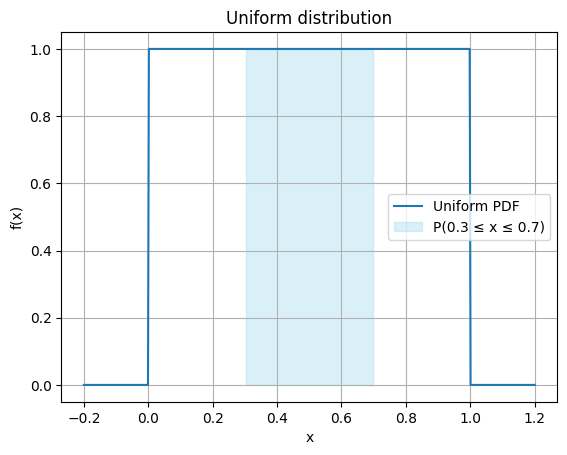

2.5


In [29]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(42)
a, b = 0, 1

def uniform_pdf(x, a, b):
    return np.where((x >= a) & (x <= b), 1 / (b - a), 0)

x = np.linspace(-0.2, 1.2, 500)
pdf_values = uniform_pdf(x, a, b)

x_i, x_j = 0.3, 0.7
area = (x_j - x_i) * (1 / (b - a))
print(f'∙ area (P({x_i} ≤ x ≤ {x_j})) = {area}\n')

plt.plot(x, pdf_values, label='Uniform PDF')
plt.fill_between(x, pdf_values, alpha=0.3, where=(x >= x_i) & (x <= x_j), label=f'P({x_i} ≤ x ≤ {x_j})', color='skyblue')
plt.title('Uniform distribution')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

print(1 / (x_j - x_i))

∙ probability P(90 ≤ x ≤ 95): 0.01654046662240305



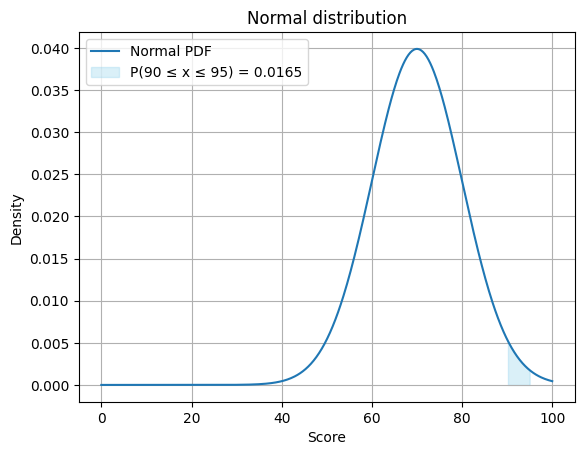

In [30]:
from scipy.stats import norm

mu, sigma = 70, 10

x = np.linspace(0, 100, 500)
pdf_values = norm.pdf(x, mu, sigma)

x_i, x_j = 90, 95
probability = norm.cdf(x_j, mu, sigma) - norm.cdf(x_i, mu, sigma)
print(f'∙ probability P({x_i} ≤ x ≤ {x_j}): {probability}\n')

plt.plot(x, pdf_values, label='Normal PDF')
plt.fill_between(x, pdf_values, alpha=0.3, where=(x >= x_i) & (x <= x_j),
                 label=f'P({x_i} ≤ x ≤ {x_j}) = {probability:.4f}', color='skyblue')
plt.title('Normal distribution')
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

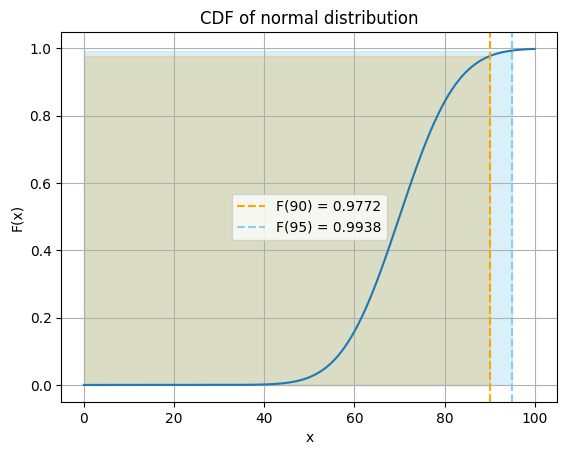

In [31]:
cdf_values = norm.cdf(x, mu, sigma)

cdf_i = norm.cdf(x_i, mu, sigma)
cdf_j = norm.cdf(x_j, mu, sigma)

plt.plot(x, cdf_values)
plt.axvline(x_i, color='orange', linestyle='--', label=f'F({x_i}) = {cdf_i:.4f}')
plt.axvline(x_j, color='skyblue', linestyle='--', label=f'F({x_j}) = {cdf_j:.4f}')
plt.fill_betweenx([0, cdf_i], 0, x_i, color='orange', alpha=0.3)
plt.fill_betweenx([0, cdf_j], 0, x_j, color='skyblue', alpha=0.3)
plt.title('CDF of normal distribution')
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()
plt.grid()
plt.show()

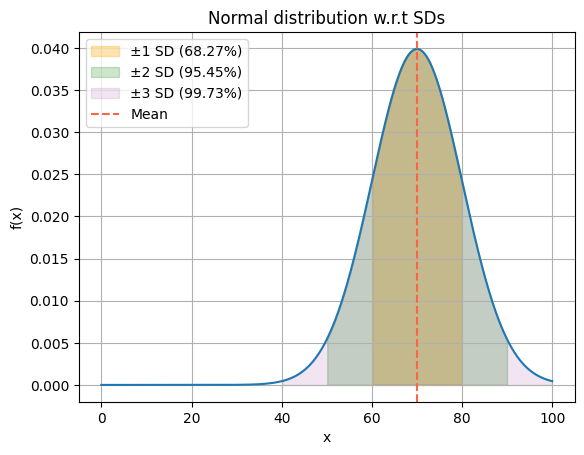

In [32]:
x_1sd = [mu - sigma, mu + sigma]
x_2sd = [mu - 2*sigma, mu + 2*sigma]
x_3sd = [mu - 3*sigma, mu + 3*sigma]

plt.plot(x, pdf_values)
plt.fill_between(x, pdf_values, where=(x >= x_1sd[0]) & (x <= x_1sd[1]), alpha=0.3, label='±1 SD (68.27%)', color='orange')
plt.fill_between(x, pdf_values, where=(x >= x_2sd[0]) & (x <= x_2sd[1]), alpha=0.2, label='±2 SD (95.45%)', color='green')
plt.fill_between(x, pdf_values, where=(x >= x_3sd[0]) & (x <= x_3sd[1]), alpha=0.1, label='±3 SD (99.73%)', color='purple')
plt.axvline(mu, color='tomato', linestyle='--', label='Mean')
plt.title('Normal distribution w.r.t SDs')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

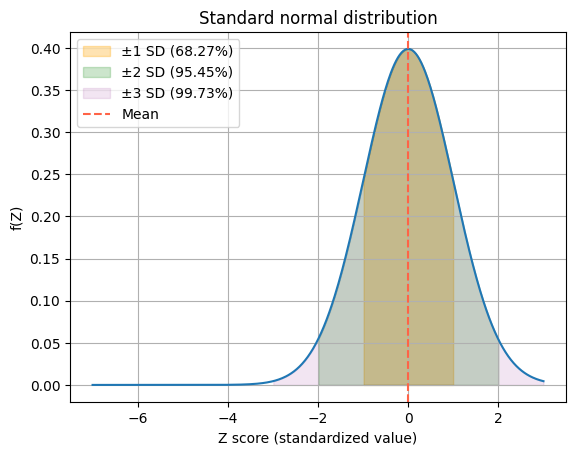

In [33]:
#unit scaling. standard deviation
z = (x - mu) / sigma
standard_pdf_values = norm.pdf(z, 0, 1)
z_1sd = [-1, 1]
z_2sd = [-2, 2]
z_3sd = [-3, 3]

plt.plot(z, standard_pdf_values)
plt.fill_between(z, standard_pdf_values, where=(z >= z_1sd[0]) & (z <= z_1sd[1]), alpha=0.3, label='±1 SD (68.27%)', color='orange')
plt.fill_between(z, standard_pdf_values, where=(z >= z_2sd[0]) & (z <= z_2sd[1]), alpha=0.2, label='±2 SD (95.45%)', color='green')
plt.fill_between(z, standard_pdf_values, where=(z >= z_3sd[0]) & (z <= z_3sd[1]), alpha=0.1, label='±3 SD (99.73%)', color='purple')
plt.axvline(0, color='tomato', linestyle='--', label='Mean')
plt.title('Standard normal distribution')
plt.xlabel('Z score (standardized value)')
plt.ylabel('f(Z)')
plt.legend()
plt.grid()
plt.show()

In [34]:
from scipy.integrate import quad

def standard_normal_pdf(z):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-z**2 / 2)

# ±1 SD, ±2 SD, ±3 SD
ranges = [(-1, 1), (-2, 2), (-3, 3)]
results = {}

for r in ranges:
    prob, _ = quad(standard_normal_pdf, r[0], r[1])
    results[f'{r[0]} ≤ Z ≤ {r[1]}'] = prob

for key, value in results.items():
    print(f'∙  probability for {key}: {value}')

∙  probability for -1 ≤ Z ≤ 1: 0.682689492137086
∙  probability for -2 ≤ Z ≤ 2: 0.9544997361036417
∙  probability for -3 ≤ Z ≤ 3: 0.9973002039367399


[74.96714153 68.61735699 76.47688538 85.23029856 67.65846625 67.65863043
 85.79212816 77.67434729 65.30525614 75.42560044] 



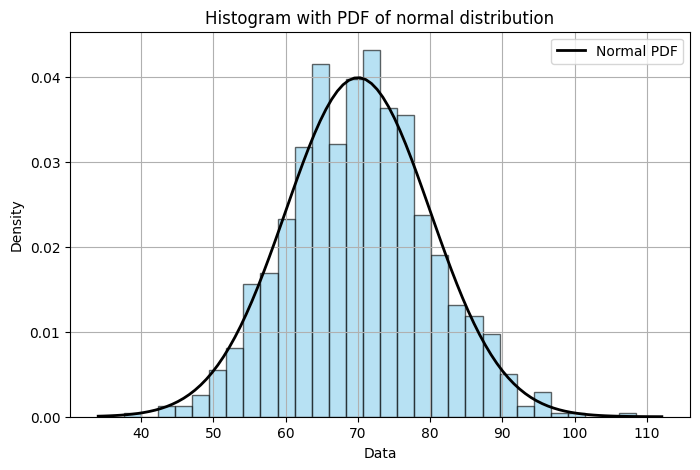

In [35]:
from scipy.stats import probplot

np.random.seed(42)
data = np.random.normal(70, 10, 1000)
print(data[0:10], '\n')

plt.figure(figsize=(8, 5))
plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 70, 10)
plt.plot(x, p, 'k', linewidth=2, label='Normal PDF')
plt.title('Histogram with PDF of normal distribution')
plt.xlabel('Data')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

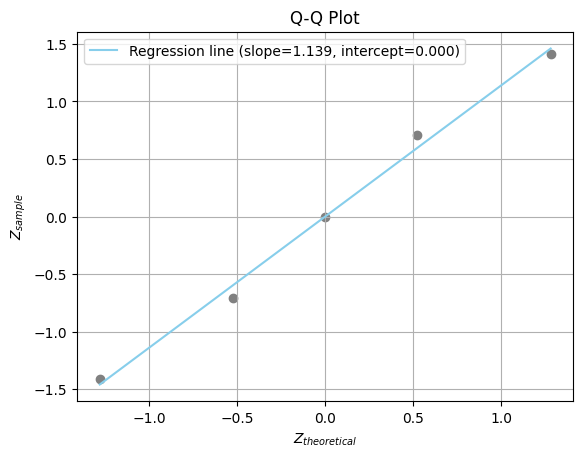

In [36]:
#x축은 완벽한 데이터, y축은 예측한 데이터
from sklearn.linear_model import LinearRegression

sample = [60, 65, 70, 75, 80]
mu, sigma = np.mean(sample), np.std(sample)

z_sample = [(x - mu) / sigma for x in sample]

n = len(sample)
p_sample = [(k - 0.5) / n for k in range(1, n + 1)]
z_theoretical = norm.ppf(p_sample)

z_theoretical = np.array(z_theoretical).reshape(-1, 1)
z_sample = np.array(z_sample)

model = LinearRegression()
model.fit(z_theoretical, z_sample)

slope = model.coef_[0]
intercept = model.intercept_

plt.scatter(z_theoretical, z_sample, color='gray')
plt.plot(z_theoretical, model.predict(z_theoretical), color='skyblue', label=f'Regression line (slope={slope:.3f}, intercept={intercept:.3f})')
plt.xlabel('$Z_{theoretical}$')
plt.ylabel('$Z_{sample}$')
plt.title('Q-Q Plot')
plt.legend()
plt.grid()
plt.show()